In [77]:
#deadline 12 Jan 2023
# Fine delle consegne: giovedì, 12 gennaio 2023, 20:00 (6 giorni mancanti)

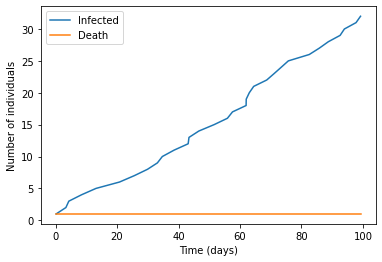

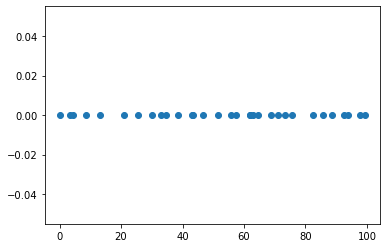

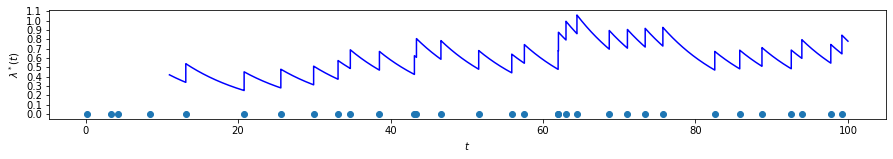

In [78]:
#importing the libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar , minimize
np.random.seed(34)

#defining some of the required functions 
# based on the slides, s=s + thau and thau is from the same distro as h(t), h(t) can be uniform or exp
# we use h(t) and sigma to create the new time 
# h(t)s are the decay kernel function
#h2 in prof's question is different from what there is in the page 11 of that pdf
        
def sigma(t):
    return 20 * (t >= 0) * (t <= 10)

#uniform h(t)
def h_uniform(t):
    return np.random.uniform(0, 20) 
#exponential h(t)
def h_expo(t): 
    lambda_exp = 1/10
    return lambda_exp * math.exp(-0.1 * (lambda_exp * t))
# intensity_at_s = sigma(s) + decay*sum(mu * np.exp(-0.1*(s - t)) for t in event_times)

# intensity_prob = sigma(s) +decay * sum( h1(s - t) for t in event_times)


def hawkes_simulation(decay, T):
    s=0
    dead_ppl=0#counts the number of dead people 
    dead_ppl_list=[] # to create the plot
    event_times=[]  # set of event times
    infected_ppl=1 #number of infected people, it should be equal to 1 in the beggining of the simulation
    last_infected=1
    infected_ppl_list=[]
    while s<T:
        intensity_at_s = sigma(s) + decay*sum( h_uniform(s - t) for t in event_times)
#         intensity_at_s = sigma(s) + decay * sum( h_expo(s - t) for t in event_times)

        delta_t=np.random.uniform(0,5) # this should be from the same distro as h(t)
#         delta_t=mu * np.exp(-beta*(s))
        s+=delta_t
        D=np.random.uniform()
        intensity_prob = sigma(s) + decay*sum( h_uniform(s - t) for t in event_times)
#         intensity_prob = sigma(s) + decay * sum( h_expo(s - t) for t in event_times)

        if D < intensity_prob/intensity_at_s: # or D * intensity_at_s < intensity_prob
#             temp_prob=0
#             for i in range(last_infected):
#                 temp_prob+=np.random.poisson(2) #we choose the value 2 which is the reproduction rate
#             last_infected=temp_prob
            infected_ppl+=1
            dead_ppl = math.ceil(0.02 * infected_ppl)
            infected_ppl_list.append(infected_ppl-dead_ppl)
            dead_ppl_list.append(dead_ppl)
            tn=s
            event_times.append(tn)
    if s<T:
        
        dead_ppl=math.ceil(0.02 * infected_ppl)  # to only get the number of dead people
        return event_times, dead_ppl, dead_ppl_list,infected_ppl_list
    elif s>=T:
        dead_ppl=math.ceil(0.02 * (infected_ppl-last_infected)) # to only get the number of dead people
        return event_times[:-1] , dead_ppl, dead_ppl_list[:-1],infected_ppl_list[:-1]


        
        
T= 100 # the upper bound for the  time of our simulation 

decay=2 #reproduction rate
        
# intensity = 0.5 # is the value lambda 

        
        
event_times,dead_ppl,dead_ppl_list,infected_ppl_list=hawkes_simulation(decay,T)
plt.figure()
plt.plot(event_times, infected_ppl_list, label='Infected')
plt.plot(event_times, dead_ppl_list, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()




# Plot the event times
plt.scatter(event_times, [0] * len(event_times))
plt.show()

smp = np.asarray(event_times)

range_list = np.arange(0, T, .001)

lda_ar = [ sigma(x) + 2 * np.sum(0.1 * np.exp(-0.1 * (x - smp[smp < x]))) for x in range_list]

# plt.figure(figsize=(15,30))
plt.figure(figsize=(15,2))
# plt.yscale("log")
plt.ylabel("$\lambda^*(t)$")
# plt.yscale('log')
# plt.ylim(10, 15)
plt.xlabel("$t$")
# plt.plot(smp, np.ones_like(smp) * T, 'k.')
# plt.yticks(np.arange(0, 20, 0.1))
plt.yticks(np.arange(0, 5, 0.1))
_ = plt.plot(range_list[11000:], lda_ar[11000:], 'b-')
plt.scatter(event_times, [0] * len(event_times))
plt.show()



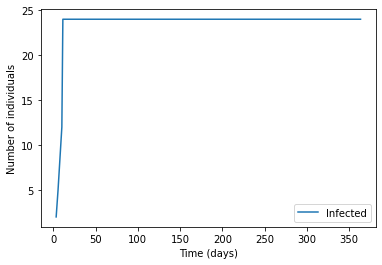

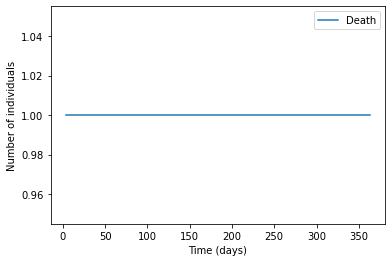

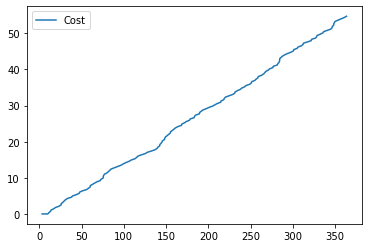

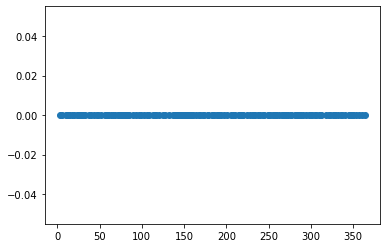

In [84]:
#Second part
# we have to re-do the the whole process but in another way 
#we have sigma and different h(t)s from the previous part 
def sigma(t):
    return 20 * (t >= 0) * (t <=10)

#uniform h(t)
def h_uniform(t):
    return np.random.uniform(0, 20) 
#exponential h(t)
def h_expo(t): 
    lambda_exp = 1/10
    return lambda_exp * math.exp(-0.1 * (lambda_exp * t))
# intensity_at_s = sigma(s) + decay*sum(mu * np.exp(-0.1*(s - t)) for t in event_times)

# intensity_prob = sigma(s) +decay * sum( h1(s - t) for t in event_times)





def cost(c):
    return c ** 2
# we can use one of these functions 
# def cost(rho, T):
#     total_cost = 0
#     for t in range(T):
#         total_cost += rho(t) ** 2
#     return total_cost

#we have sigma from the previous part 

def hawkes_simulation_generalized(decay,T):
    dead_ppl_list=[] # to create the plot
    event_times=[]  # set of event times
    infected_ppl_list=[]
    cost_values=[]
    max_death=20000
    last_infected=1
    infected_ppl=1 #number of infected people, it should be equal to 1 in the beggining of the simulation
    s=0
    dead_ppl=0#counts the number of dead people 
    rho=1
    initialization=False
    initialization_time=10
    while s<T:
        intensity_at_s = sigma(s) + decay*sum( h_uniform(s - t) for t in event_times) # creating the current intensity
#         intensity_at_s = sigma(s) + decay * sum( h_expo(s - t) for t in event_times)
        if s >= initialization_time:
            initialization=True
            rho = 1e5 * minimize_scalar(lambda rho: cost(rho) + (T-s)/T * (dead_ppl_list[-1]/s - max_death/T)**2, bounds=(0, 1), method='bounded').x
        
        delta_t=np.random.uniform(0,5)
        s+=delta_t
        D=np.random.uniform()
        intensity_prob = rho*(sigma(s) + decay*sum( h_uniform(s - t) for t in event_times))
#         intensity_prob = rho*(sigma(s) + decay * sum( h_expo(s - t) for t in event_times))
        temp_prob=[]
        if D <= (intensity_prob/intensity_at_s):
            temp_prob=[np.random.poisson(decay) for i in range(last_infected)]
        last_infected=sum(temp_prob) # we update the numer of last layer of the infeced tree of ppl
        infected_ppl+=last_infected
        dead_ppl=math.ceil(0.02 * infected_ppl) # we update the number of dead people 
        dead_ppl_list.append(dead_ppl)
        infected_ppl_list.append(infected_ppl-dead_ppl) # adding the number of infected people 
        event_times.append(s)
        if initialization==False:
            cost_values.append(0) # means there has been no cost 
        else:
            cost_values.append(cost_values[-1] + cost(rho))
    if s<T:
        return event_times, dead_ppl, dead_ppl_list, infected_ppl_list, cost_values
            
    else:
        return event_times[:-1] , dead_ppl, dead_ppl_list[:-1],infected_ppl_list[:-1], cost_values[:-1]

    
    
decay= 2
T=365    
event_times,dead_ppl,dead_ppl_list,infected_ppl_list,cost_values=hawkes_simulation_generalized(decay,T)






plt.figure()
plt.plot(event_times, infected_ppl_list, label='Infected')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

plt.figure()
plt.plot(event_times, dead_ppl_list, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

plt.figure()
plt.plot(event_times, cost_values, label='Cost')
plt.legend()
plt.show()

# Plot the event times
plt.scatter(event_times, [0] * len(event_times))
plt.show()


